In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ow = pd.read_excel('/Users/Owner/OneDrive/Desktop/OW Stats.xlsx')

In [2]:
ow

,Season,Game Type,Map,Game Time,Hero,Healing,Damage,Heal per 10min,DPS per 10min,Per 10min,...,Medal,SR Before,SR After,Gain/Loss,W/L,Notes,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,32.0,2 CP,Temple of Anubis,570,Ana,5540,1780,5831.58,1873.68,5832.0,...,Silver,2538,2561,23,W,NaN,NaN,NaN,Average Healing,8607.846886
1,32.0,Capture,Busan,568,"Ana, Zenyatta",3551,2868,3751.06,3029.58,3751.0,...,Silver,2561,2583,22,W,NaN,NaN,NaN,Average Ratio,3.990493
2,32.0,Push,Rialto,1387,Ana,19198,4168,8304.83,1803.03,8305.0,...,Gold,2583,2561,-22,L,NaN,NaN,NaN,Average SR,2574.474747
3,32.0,Caputure,Lijiang Tower,388,"Ana, Lucio",5998,1436,9275.26,2220.62,9275.0,...,Silver,2561,2540,-21,L,NaN,NaN,NaN,Win,47.000000
4,32.0,Push,Watch Gibraltor,741,Ana,8355,3326,6765.18,2693.12,6765.0,...,SIlver,2540,2566,26,W,NaN,NaN,NaN,Loss,75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,NaN,Capture,Busan,508,Lucio,8965,3059,10588.6,3612.99,NaN,...,Gold,2444,2421,-23,L,NaN,NaN,NaN,NaN,NaN
142,NaN,2 CP,Temple of Anubis,840,Ana,14269,2902,10192.1,2072.86,NaN,...,Silver,2421,2446,25,W,NaN,NaN,NaN,NaN,NaN
143,NaN,Push,Route 66,352,Ana,8635,693,14718.8,1181.25,NaN,...,Gold,2446,2472,26,W,NaN,NaN,NaN,NaN,NaN
144,NaN,Hybrid,King's Row,615,Zenyatta,6988,2970,6817.56,2897.56,NaN,...,Silver,2472,2248,-224,L,NaN,NaN,NaN,NaN,NaN


In [3]:
ow.columns

Index(['Season', 'Game Type', 'Map', 'Game Time', 'Hero', 'Healing', 'Damage',
       'Heal per 10min', 'DPS per 10min', 'Per 10min', 'DPS 10min',
       'H/D Ratio', 'Medal', 'SR Before', 'SR After', 'Gain/Loss', 'W/L',
       'Notes', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

Text(0.5, 1.0, 'SR Per Game')

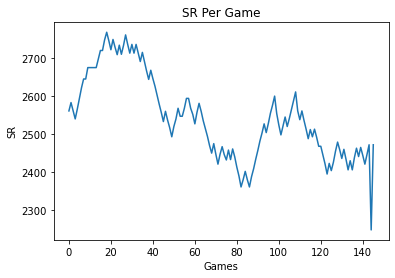

In [4]:
#SR change per game
Games=range(ow.shape[0])
ow['Game Num']= Games
x = ow['Game Num']
y = ow['SR After']
plt.plot(x,y)
plt.xlabel('Games')
plt.ylabel('SR')
plt.title('SR Per Game')

<AxesSubplot:xlabel='Game Type', ylabel='count'>

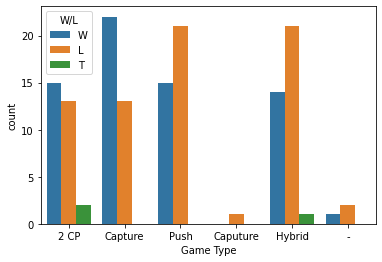

In [5]:
#W/L/T per game type
sns.countplot(x='Game Type', hue='W/L', data=ow)


Text(0.5, 1.0, 'CumAvg SR Per Game')

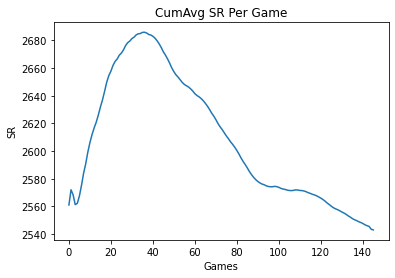

In [6]:
#cumavg SR 
Games=range(ow.shape[0])
ow['Game Num']= Games
x = ow['Game Num']
y = ow['SR After'].expanding().mean()
plt.plot(x,y)
plt.xlabel('Games')
plt.ylabel('SR')
plt.title('CumAvg SR Per Game')

Text(0.5, 1.0, 'Gain/Loss')

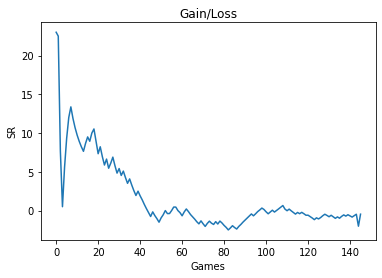

In [7]:
#cumavg SR 
x = ow['Game Num']
y = ow['Gain/Loss'].expanding().mean()
plt.plot(x,y)
plt.xlabel('Games')
plt.ylabel('SR')
plt.title('Gain/Loss')

(array([  1.,   1., 143.,   0.,   1.]),
 array([-224. , -134.4,  -44.8,   44.8,  134.4,  224. ]),
 <BarContainer object of 5 artists>)

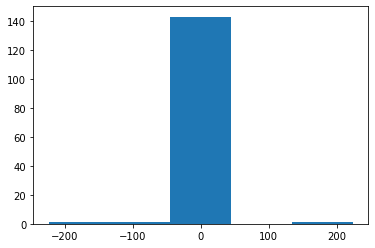

In [8]:
plt.hist(ow['Gain/Loss'], bins=5)

In [9]:
gl=list(ow['Gain/Loss'])

In [10]:
#finding outliers
for i in gl:
    if i>28:
        print(i)
    elif i<-28:
        print(i)

30
-29
-30
-50
29
32
-224
224


In [11]:
#ow.groupby(['Map'])['Healing','Damage'].agg([np.mean, np.std])
a=['Per 10min','DPS 10min']
ow.groupby(["Map"])[a].agg([np.mean, np.std, np.min, np.max])


Per 10min                                  DPS 10min  \
                             mean          std    amin     amax         mean   
Map                                                                            
-                             NaN          NaN     NaN      NaN          NaN   
Blizzard World        8012.333333  4174.141389  4618.0  12673.0  2536.125000   
Busan                 6173.000000  2101.476624  3751.0   7513.0  3000.600000   
Dorado                8627.800000  1898.046417  6316.0  11470.0  2188.800000   
Eichenwalde           9477.800000  2004.229079  6574.0  11726.0  1978.000000   
Hanamura              5923.000000  4647.335473  1606.0  10842.0  1953.666667   
Havana                6515.000000          NaN  6515.0   6515.0  1934.500000   
Hollywood             9950.500000  3210.546942  7055.0  14179.0  2160.833333   
Ilios                 9433.000000  2169.479661  6721.0  12593.0  3578.900000   
Junkertown            7207.333333   905.841782  6378.0   8174.0  1935.666667   
King's Row            7711.000000          NaN  7711.0   7711.0  2656.571429   
Lijiang Tower        10039.600000  2986.466524  6002.0  13771.0  4027.700000   
Nepal                10051.000000  1882.773353  7527.0  12533.0  3648.444444   
Numbani               8612.333333  1180.967541  7249.0   9320.0  2320.166667   
Oasis                 7703.500000  3985.025010  3521.0  12768.0  3317.400000   
Rialto                7492.200000   715.702243  6764.0   8305.0  2085.888889   
Route 66                      NaN          NaN     NaN      NaN  2728.000000   
Temple of Anubis      6745.500000  1202.116592  5084.0   8440.0  1922.500000   
Volskaya Industries   8347.500000  3076.591241  4780.0  11076.0  1634.181818   
Watch Gibraltor       7995.500000  1740.189789  6765.0   9226.0  2338.833333   

                                                  
                             std    amin    amax  
Map                                               
-                            NaN     NaN     NaN  
Blizzard World        803.013154  1477.0  3534.0  
Busan                 678.636353  1880.0  3613.0  
Dorado                420.125325  1623.0  3011.0  
Eichenwalde           693.588855  1342.0  3699.0  
Hanamura             1208.359163     1.0  2997.0  
Havana                960.958116  1255.0  2614.0  
Hollywood             839.557364  1401.0  3632.0  
Ilios                 868.979919  2231.0  4835.0  
Junkertown            456.919978  1427.0  2510.0  
King's Row           1309.843611  1531.0  5465.0  
Lijiang Tower        1501.962424  1610.0  5688.0  
Nepal                1457.014937   917.0  5010.0  
Numbani               444.306388  1743.0  2761.0  
Oasis                1976.543903   448.0  5927.0  
Rialto                756.627128  1258.0  3278.0  
Route 66             1446.162854  1181.0  4046.0  
Temple of Anubis      306.041845  1388.0  2240.0  
Volskaya Industries   666.791994   929.0  3138.0  
Watch Gibraltor       883.184333   878.0  3394.0